In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
print(os.getcwd())
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
print(os.getcwd())
os.listdir()

/content
/content/gdrive/My Drive/Colab Notebooks


['iris.csv',
 'Churn_Modelling.csv',
 'emails.csv',
 'netflix_titles.csv',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 'Untitled0.ipynb',
 'CSV.ipynb',
 'Mall.csv',
 'labReport.ipynb',
 'train.csv',
 'Copy of logistic.ipynb',
 'iris.ipynb',
 'iris22.ipynb',
 'csv22.ipynb',
 'tested.csv',
 'Copy of iris22 (1).ipynb',
 'Copy of iris22.ipynb',
 'xm22.ipynb',
 'Untitled4.ipynb',
 ' oCustomer_Churn11.ipynb',
 '  Customer_Churn.ipynb',
 'Social_Network_Ads.csv',
 'Copy of lab8.ipynb',
 'lab8.ipynb',
 'Customer_Churn (1).ipynb',
 'Untitled5.ipynb',
 'Untitled6.ipynb',
 'CLP1.ipynb',
 'Copy of student-mat.csv',
 'Copy of Copy of student-mat.csv',
 'Untitled7.ipynb',
 'heart.csv',
 'xAPI-Edu-Data.csv',
 'clp.ipynb',
 'cleaned_dataset.csv',
 'student-mat.csv',
 'Report_2.ipynb',
 ' Report_3.ipynb',
 'iris.data.csv',
 'Copy of Untitled8.ipynb',
 'Untitled8.ipynb',
 'Sleep_health_and_lifestyle_dataset.csv',
 'final.ipynb',
 'Projectr of Heart Disease prediction.ipynb']

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data = pd.read_csv("heart.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
sex,1025.000000,0.695610,0.460373,0.000000,0.000000,1.000000,1.000000,1.000000
cp,1025.000000,0.942439,1.029641,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
chol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
fbs,1025.000000,0.149268,0.356527,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,1025.000000,0.529756,0.527878,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
exang,1025.000000,0.336585,0.472772,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000


In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

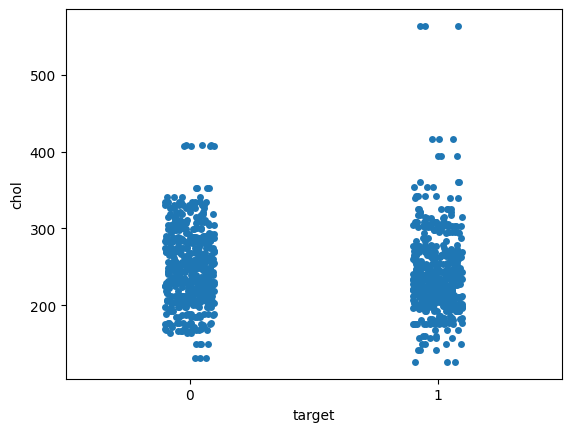

In [ ]:
sns.stripplot (x='target', y='chol', data=df, alpha=1,jitter=True);

In [ ]:
X = data.drop('target', axis=1)
y = data['target']


<Axes: xlabel='age', ylabel='count'>

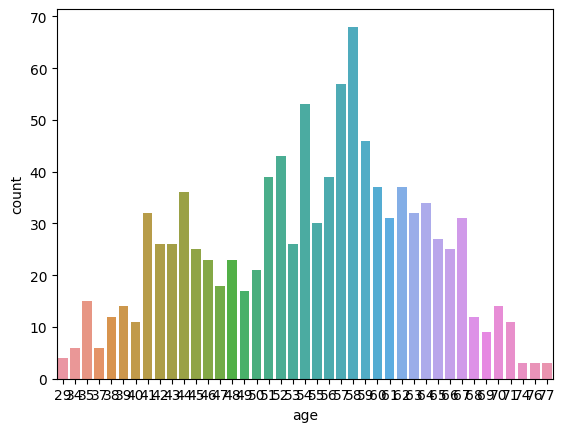

In [ ]:
sns.countplot(x='age',data=df)

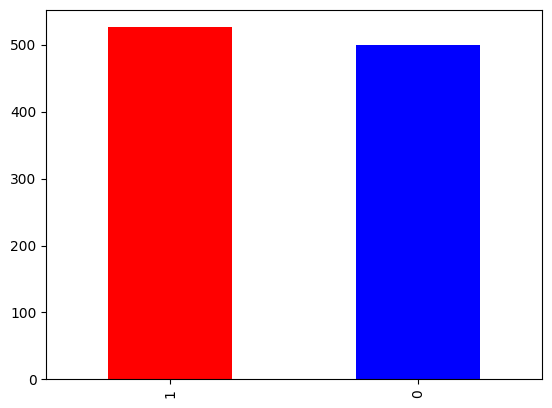

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

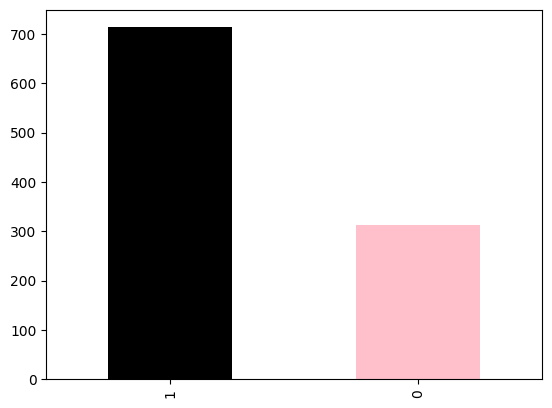

In [ ]:
df["sex"].value_counts().plot(kind="bar", color=["Black", "Pink"]);

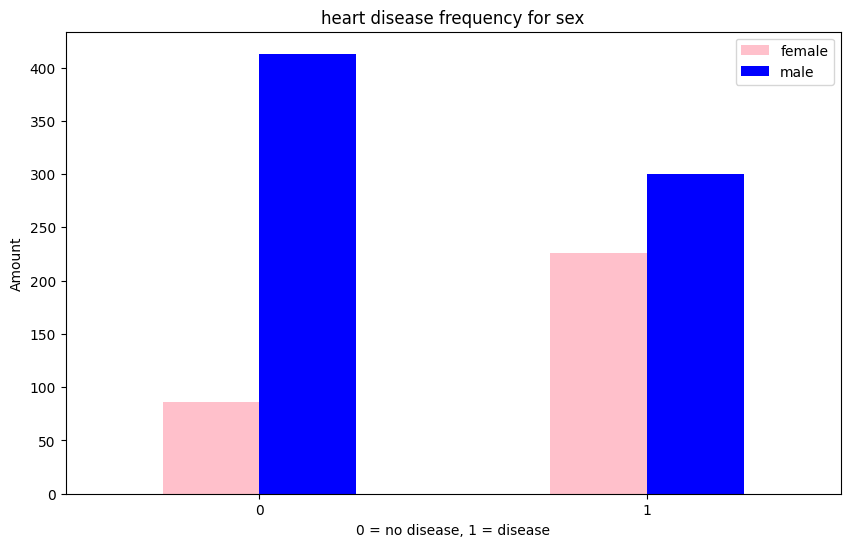

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["pink","blue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0);


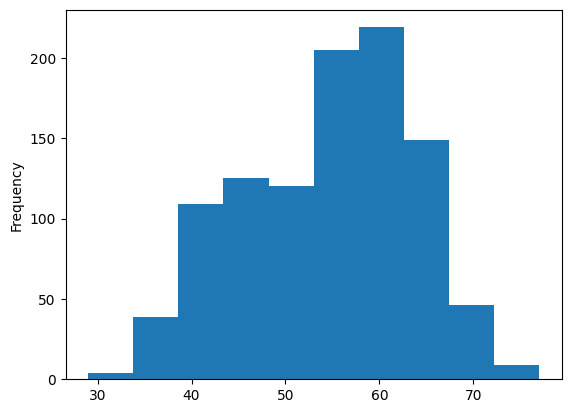

In [ ]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

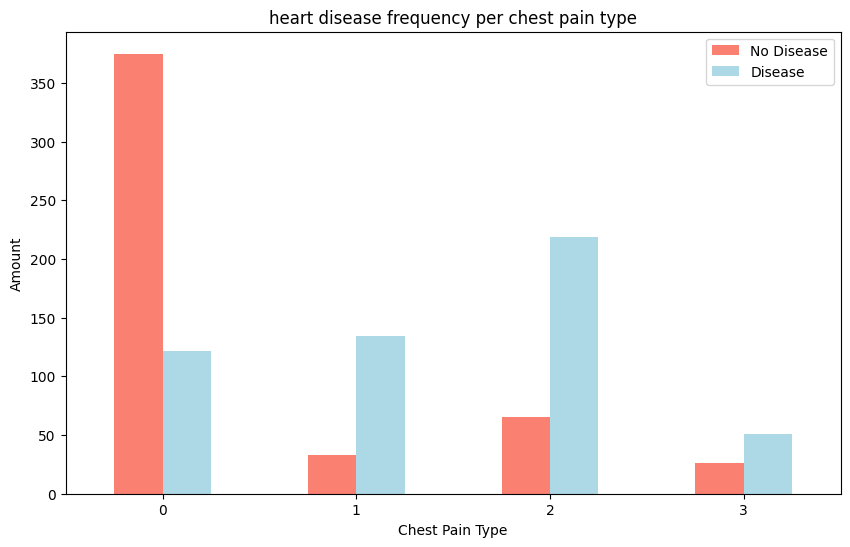

In [ ]:
# make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"])
# Add some communication
plt.title("heart disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

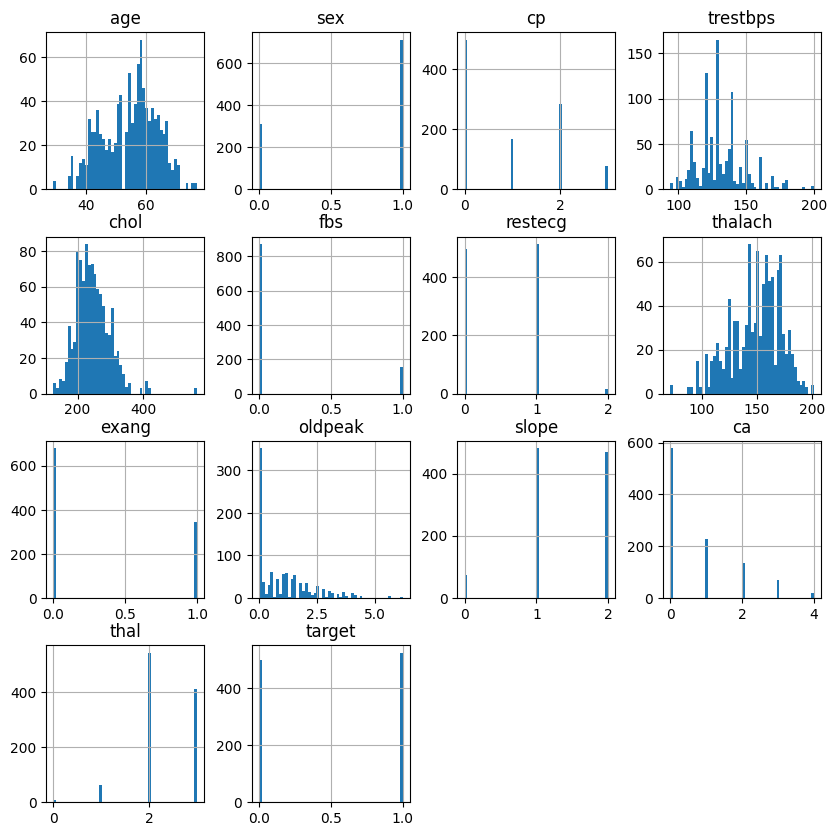

In [ ]:
df.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: xlabel='age', ylabel='Density'>

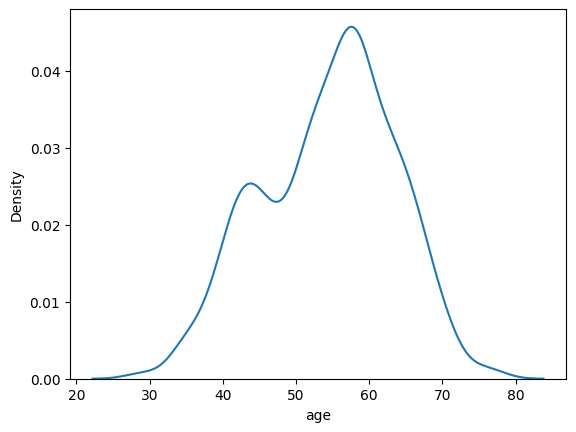

In [ ]:
sns.kdeplot(df['age'])

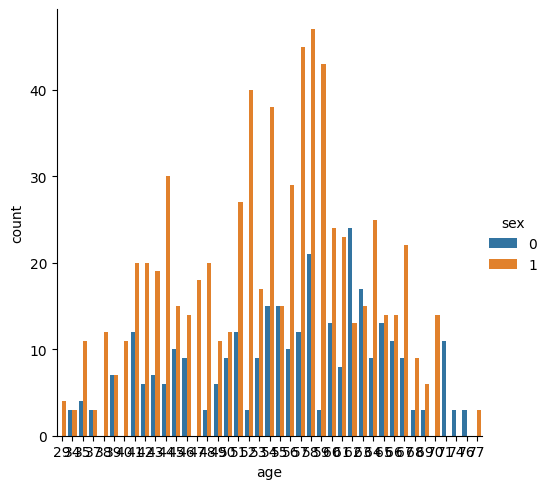

In [ ]:
sns.catplot(data=df, kind='count', x='age',hue='sex')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=41)

In [ ]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=41)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
accl= metrics.accuracy_score(y_test, y_pred)
print(accl)

1.0


In [ ]:
acc2=metrics.accuracy_score(y_test,y_pred)
print(acc2)

1.0


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score
# create a decision tree classifier
dt = DecisionTreeClassifier()
# perform 15-fold cross-validation
scores = cross_val_score(dt, X, y, cv=15)
# print the mean accuracy score
print('Mean accuracy:', scores.mean())


Mean accuracy: 0.9970588235294119
